# 1 - Introducción al aprendizaje supervisado

## Contexto:

Uno de los problemas más complejos de la actualidad es la autorización de créditos a clientes. Un desafío de interés tanto para las instituciones bancarias como para los negocios que ofrecen planes crediticios, ya que necesitan definir si el cliente cuenta o no con los requisitos para obtener el beneficio.

Esto puede considerarse un problema de clasificación, que se resolverá al generar un modelo que te permita clasificar o predecir si al solicitante se le asigna o no el crédito.

## 1.1 - Aprendizaje Supervisado

Para obtener el modelo de clasificación deseado, utilizaremos la técnica de aprendizaje supervisado, que se basa en un conjunto de entrenamiento compuesto por:

- **Variables de entrada**
- **Variable de salida**

En el caso de las autorizaciones crediticias, se manejan múltiples variables además del monto solicitado.

Usaremos datos del repositorio de la Universidad de California en Irvine (UCI), disponible en [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

Trabajaremos con el conjunto de datos "German Credit Data", que contiene atributos de clientes que solicitan créditos. El objetivo es determinar si un cliente es confiable y si la solicitud de crédito representa un riesgo.


In [1]:
import pandas as pd

germandata = pd.read_csv('GermanCredit.csv')
display(germandata.head())
display(germandata.info())

,AsignarCredito,duracion,historial,proposito,monto,ahorros,edocivil,edad,otroscreditos,casa,otrosplanes,trabajo,carro,extranjero
0,0,18,4,2,1049,1,2,21,3,1,1,3,1,1
1,0,9,4,0,2799,1,3,36,3,1,2,3,1,1
2,0,12,2,9,841,2,2,23,3,1,1,2,1,1
3,0,12,4,0,2122,1,3,39,3,1,2,2,1,2
4,0,12,4,0,2171,1,3,38,1,2,2,2,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AsignarCredito  1000 non-null   int64
 1   duracion        1000 non-null   int64
 2   historial       1000 non-null   int64
 3   proposito       1000 non-null   int64
 4   monto           1000 non-null   int64
 5   ahorros         1000 non-null   int64
 6   edocivil        1000 non-null   int64
 7   edad            1000 non-null   int64
 8   otroscreditos   1000 non-null   int64
 9   casa            1000 non-null   int64
 10  otrosplanes     1000 non-null   int64
 11  trabajo         1000 non-null   int64
 12  carro           1000 non-null   int64
 13  extranjero      1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


None

**Nota:** Aquí observarás que la variable de salida, `AsignarCredito`, toma los valores de 0 para indicar que esta solicitud de crédito no representa un riesgo y el valor de 1 indicando que sí representa un riesgo. En lo sucesivo se denomina como `Y` a la variable de salida `AsignarCredito`.

Los valores históricos conocidos de 0s y 1s de la variable de salida `AsignarCredito` permiten considerar este problema como un problema de aprendizaje supervisado de clasificación. La finalidad será diseñar y entrenar un modelo de clasificación supervisado que pueda predecir a cuál de las dos clases pertenece cada registro:

- **Clase 1:** Cliente de riesgo (`AsignarCredito` = 1)
- **Clase 0:** Cliente no riesgoso (`AsignarCredito` = 0)

Aunque todas las variables están registradas como numéricas, una inspección revela que varias de ellas son categóricas o cualitativas. A continuación, se presenta la información sobre cada variable:

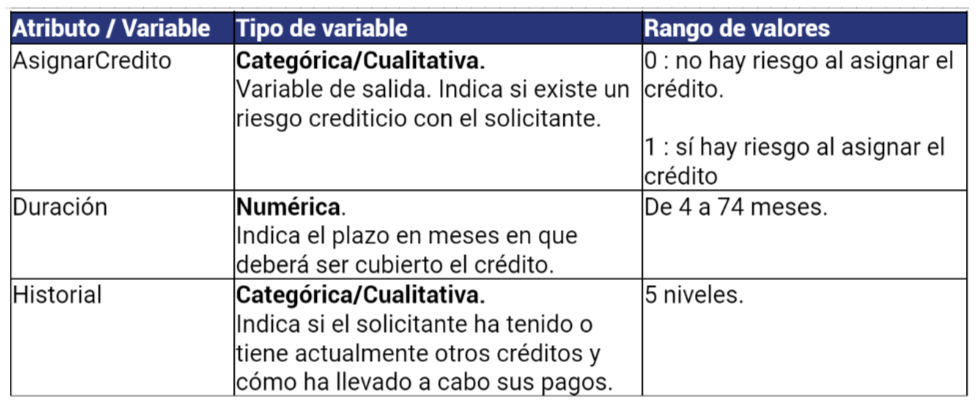
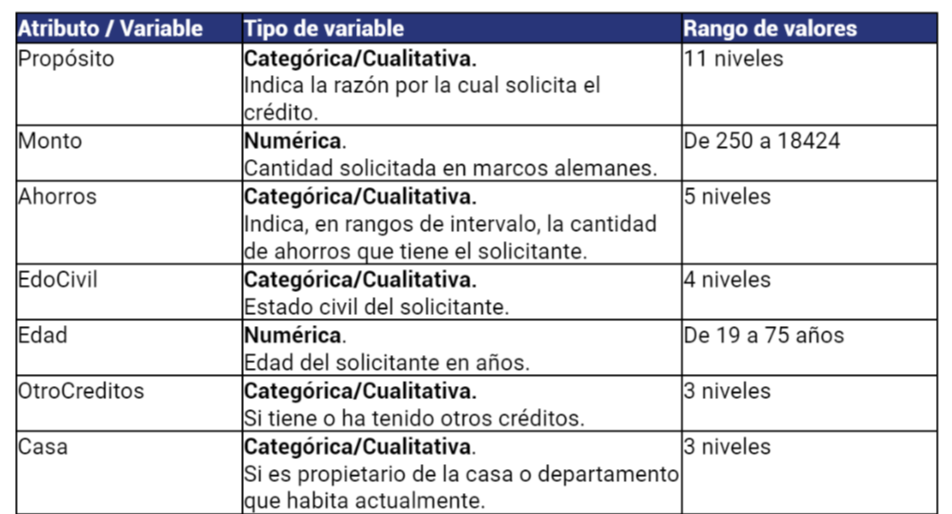
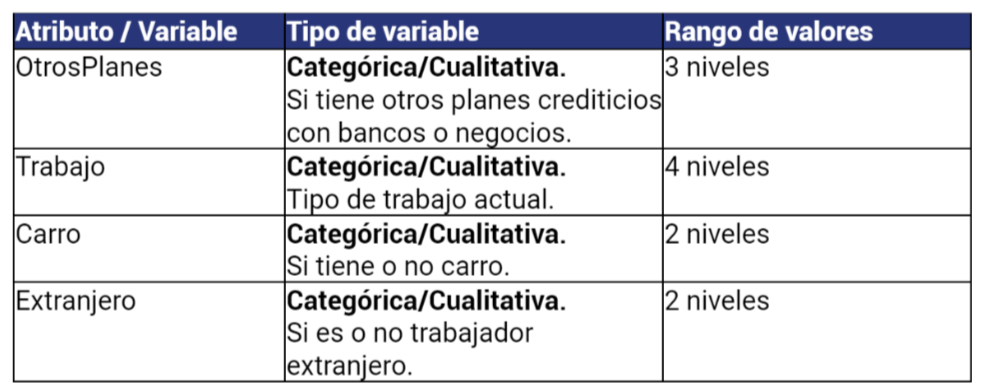

En este caso, las variables categóricas se registraron con valores enteros, por lo que inicialmente se tratarán como numéricas. A partir de los resultados obtenidos, se mejorará el modelo. Dado que los niveles de cada clase son 0 y 1, se puede obtener el total de registros sumando los valores de la columna correspondiente.


In [2]:
sum(germandata['AsignarCredito'])

300

Puedes inferir con la información que te arrojan estos datos, que de los 1,000 registros que tienes, 300 son de la clase de crédito de riesgo y 700 de la clase de crédito no riesgoso.

## 1.2 - El impacto del manejo de las bases de datos

### Extracción de información

Retomemos el ejemplo de la solicitud de crédito, en el que hicimos una inspección general de los datos. Existe gran potencial de información latente en los datos originales. Tu tarea será saber cómo organizarlos para extraer dicha información.

La primera etapa de la técnica del aprendizaje supervisado consiste en identificar los conjuntos de las variables de entrada y la variable de salida.

In [3]:
X = germandata[['duracion','historial','proposito','monto','ahorros','edocivil','edad',
            'otroscreditos','casa','otrosplanes','trabajo','carro','extranjero']]
Y = germandata['AsignarCredito']

X = X.values
Y = Y.values

print(X)

[[18  4  2 ...  3  1  1]
 [ 9  4  0 ...  3  1  1]
 [12  2  9 ...  2  1  1]
 ...
 [21  4  0 ...  4  2  1]
 [12  2  3 ...  4  2  1]
 [30  2  2 ...  3  1  1]]


Para este caso particular usaremos un **70% para el conjunto de entrenamiento, un 15% para el conjunto de validación y el 15% restante para el conjunto de prueba.**
Mediante los comandos de la librería de scikit-learn puedes obtener estos porcentajes como se muestra a continuación:

In [4]:
from sklearn.model_selection import train_test_split

x_train_validation, x_test, y_train_validation, y_test = \
train_test_split(X, Y, test_size=0.15)

x_train, x_validation, y_train, y_validation = \
train_test_split(x_train_validation, y_train_validation, test_size=0.176)

La primera partición genera el conjunto de prueba con un 15% de los datos. Es importante recalcar que este conjunto de prueba **ya no deberá tocarse sino hasta al final, cuando se desee obtener el desempeño final del modelo.** 

Con 850 de los registros restantes generas el conjunto de entrenamiento y validación. En particular, si deseas obtener un conjunto de validación con 150 registros, entonces el valor de porcentaje en la segunda partición debe ser:

$$150/850≈0.176150/850≈0.176$$

> **Recuerda que:** 

1. Los datos del conjunto de entrenamiento se utilizan para obtener los pesos del modelo de clasificación de una manera supervisada.

2. Los datos del conjunto de validación los estarás usando para comprobar qué tan bien se está comportando tu modelo cuando haces modificaciones o ajustes a los hiperparámetros del modelo.

3. Y finalmente el conjunto de prueba lo usarás para obtener el desempeño final del modelo.

Verifica la dimensión de cada uno de los tres conjuntos generados:

In [5]:
print( "Dimensión X_train_set:\t\t", x_train.shape)
print( "Dimensión X_validation_set:\t", x_validation.shape)
print ("Dimension X_test_set:\t\t", x_test.shape)
print("\nDimensión Y_train:\t\t", y_train.shape)
print ("Dimensión Y_validation:\t\t", y_validation.shape)
print ("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (700, 13)
Dimensión X_validation_set:	 (150, 13)
Dimension X_test_set:		 (150, 13)

Dimensión Y_train:		 (700,)
Dimensión Y_validation:		 (150,)
Dimensión Y_test:		 (150,)


Tu objetivo es predecir si una solicitud de crédito es o no considerada riesgosa. Es decir, te encuentras con un problema de clasificación binaria, donde 0 significa solicitante no riesgoso y 1 significa solicitante riesgoso. 

Aplica uno de los principales modelos en problemas de clasificación binaria, a saber, el modelo de **Regresión Logística.**

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=1000)
modelo_RL = clf.fit(x_train, y_train)

print(
    "Precisión del modelo de regresión logística: ",
    modelo_RL.score(x_validation, y_validation),
)

Precisión del modelo de regresión logística:  0.7666666666666667


### Actividad Adicional

Puedes volver a ejecutar los siguientes pasos:

1. **Partición de datos**: Divide el conjunto en **entrenamiento** y **validación**, manteniendo intacto el conjunto de **prueba**.
2. **Ajuste del modelo**: Entrena el modelo con el conjunto de entrenamiento y ajusta sus hiperparámetros usando el conjunto de validación.
3. **Evaluación de exactitud**: Calcula el porcentaje de exactitud utilizando el conjunto de validación.

Para reducir la variabilidad en los resultados, repite estos pasos **10 veces** y calcula el **promedio** y la **desviación estándar** de la exactitud obtenida en el conjunto de validación.

Recuerda que el conjunto de **prueba** debe permanecer sin modificaciones hasta la evaluación final.

In [7]:
import numpy as np

exactitud = []

for k in range(1, 10):
    x_train, x_validation, y_train, y_validation = train_test_split(
        x_train_validation, y_train_validation, test_size=0.176
    )

    clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=5000)
    modelo_RL = clf.fit(x_train, y_train)
    exactitud.append(modelo_RL.score(x_validation, y_validation))

print("Precicion promdio:", np.mean(exactitud))
print("Desviación estandar:", np.std(exactitud))

Precicion promdio: 0.74
Desviación estandar: 0.030143688813890058


Para mejorar los resultados, ajusta los siguientes hiperparámetros del modelo de **regresión logística**:

1. **Porcentaje de partición**: Modifica la distribución entre el conjunto de **entrenamiento** y **validación** para evaluar su impacto en la generalización del modelo.
2. **Constante de regularización inversa \( C \)**: Ajusta el valor de **\( C \)** para controlar la penalización aplicada a los coeficientes del modelo.
3. **Solver**: Experimenta con diferentes algoritmos de optimización (`liblinear`, `lbfgs`, `saga`, etc.) para mejorar la convergencia y estabilidad del modelo.
4. **Número máximo de iteraciones**: Aumenta el número de iteraciones si el modelo no converge correctamente.

Consulta la documentación de **scikit-learn** para explorar otros parámetros y mejorar el ajuste del modelo:  
[Regresión Logística en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# 2 - Preparacion de la informacion


En tu labor diaria realizas muchas actividades relacionadas con la carga de bases de datos, tales como:

- Datos de los clientes
- Datos de los empleados de la empresa
- Comentarios de los usuarios en redes sociales
- Comentarios en la página de la empresa

Es necesario que sepas cómo obtener el mayor provecho de todos estos datos para tu mayor beneficio.

## 2.1 - La carga de la base de datos

### 2.1.1 Guardar la informacion

Los datos pueden presentarse en distintos formatos, siendo uno de los más comunes el **CSV** (valores separados por comas). Este formato es ampliamente utilizado para almacenar y transferir datos estructurados.

Ya has trabajado previamente con este formato, por lo que ahora revisarás los pasos necesarios para guardar y leer información en **CSV**.

In [9]:
import pandas as pd

A = ["Luis", "Diana", "Laura"]
B = [21, 18, 27]
C = ["Licenciado", "Dentista", "Abogado"]

Diccionario = {"Nombre": A, "Edad": B, "Profesion": C}
df = pd.DataFrame(Diccionario)
print(df)
df.to_csv("datos1.csv")

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


En lugar de utilizar comas para separar los valores en cada registro, puedes optar por utilizar **tabuladores**. Para lograr esto, debes seguir los siguientes pasos:

In [10]:
df.to_csv("datos2.csv", sep="\t")

También puedes guardar la información **sin el indexado de los registros** y **sin los encabezados de las columnas**. Para ello, utiliza la siguiente instrucción:

In [11]:
df.to_csv("datos3.csv", header=False, index=False)

### 2.1.2 - Recuperar la informacion

Ahora que has aprendido a guardar la información en un archivo CSV, es momento de **recuperarla y cargarla** en una variable dentro de tu proyecto en **Jupyter Notebook**.

Debes realizar este procedimiento cada vez que necesites leer información previamente guardada en archivos CSV, ya sea generados por ti o por terceros.

En el primer ejemplo, aprenderás a leer el archivo **"datos1.csv"**, que contiene:
- Registros separados por comas.
- Nombre de las columnas.
- Índice de cada registro.

Para cargar esta información en tu proyecto, usa la siguiente instrucción:

In [23]:
df1 = pd.read_csv("datos1.csv", index_col=0, header='infer')
print(df1)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


Si los registros fueron guardados utilizando **tabuladores** en lugar de comas, debes especificarlo al leer el archivo. 

En este caso, la información está almacenada en **"datos2.csv"**, por lo que la instrucción adecuada para cargarla será la siguiente:

In [22]:
df2 = pd.read_csv("datos2.csv", sep="\t", index_col=0, header='infer')
print(df2)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


Por último, si necesitas recuperar la información del archivo **"datos3.csv"**, donde:

- Los registros están separados por comas.
- No incluye nombres o encabezados de columnas.
- No incluye el índice de cada registro.

Debes usar la siguiente instrucción para leer correctamente el archivo:

In [21]:
df3 = pd.read_csv("datos3.csv", header=None)
print(df3)

       0   1           2
0   Luis  21  Licenciado
1  Diana  18    Dentista
2  Laura  27     Abogado


En estos casos, si deseas agregar los nombres a las columnas para tener una mejor referencia de los datos, se puede hacer de la forma siguiente:

In [20]:
df3.columns = ["Nombre", "Edad", "Profesion"]
print(df3)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


-- No need to reproduce: df4 = pd.read_excel("datos1.xlsx", index_col=0, header='infer')

### 2.1.3 - Datos perdidos

En tu trabajo como científico de datos, es común recibir información de otros departamentos con **datos faltantes** o **erróneos**. Esto no significa que el archivo esté dañado, sino que algunos registros no contienen todos los valores esperados.

Existen diversas razones por las que la información puede estar incompleta, pero **afortunadamente**, hay funciones que te permitirán manejar esta situación de manera efectiva.

#### Manejo de Registros Perdidos con NumPy

Una forma de gestionar registros perdidos es utilizando la **librería NumPy**. Para ello, primero debes importar la librería e incluir la instrucción `np.nan`, que permite representar valores faltantes en los datos.

Esta técnica se aplica tanto a **datos numéricos** como a **datos categóricos**.

In [19]:
import numpy as np

A =["Luis", "Diana", "Laura"]
B = [21, np.nan, 27]
C = ["Licenciado", "Dentista", "Abogado"]

diccionario = {"Nombre": A, "Edad": B, "Profesion": C}
df5 = pd.DataFrame(diccionario)
print(df5)

  Nombre  Edad   Profesion
0   Luis  21.0  Licenciado
1  Diana   NaN    Dentista
2  Laura  27.0     Abogado


### Identificación de Datos Perdidos en un DataFrame

Al visualizar la información de un **DataFrame** con la función `head()`, los datos faltantes aparecen representados como **NaN** (Not-a-Number).

Cuando el número de filas y columnas en el DataFrame es grande, es necesario utilizar funciones adicionales para detectar y cuantificar los datos faltantes.

Una opción útil es la función info(), que muestra el número total de registros, permitiendo identificar fácilmente qué factores tienen información incompleta.

In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre     3 non-null      object 
 1   Edad       2 non-null      float64
 2   Profesion  3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 204.0+ bytes


Al usar la función `info()`, puedes identificar cuántos valores **no nulos** hay en cada columna del **DataFrame**.

Ejemplo de resultados:

- **Nombre**: 3 registros no nulos.
- **Edad**: 2 registros no nulos.
- **Profesión**: 3 registros no nulos.

Esto indica que **falta un valor en la columna "Edad"**, y esta técnica es útil sin importar la cantidad de registros o variables que tenga el conjunto de datos.

In [28]:
df5.isnull().sum()

Nombre       0
Edad         1
Profesion    0
dtype: int64

#### Opciones para Manejar Datos Perdidos

El problema de los **datos perdidos** no tiene una única solución, y existen diversas estrategias para abordarlo. A continuación, se presentan dos opciones comunes:

1. **Eliminación de registros con datos perdidos**  
   - Se descartan las filas donde aparecen valores faltantes.
   - Útil cuando la cantidad de datos perdidos es pequeña y no afecta significativamente el análisis.

2. **Sustitución de valores faltantes**  
   - Se reemplazan los datos perdidos utilizando un criterio específico, como:
     - Media o mediana (para datos numéricos).
     - Valor más frecuente (para datos categóricos).
     - Un valor específico como "Desconocido" o "N/A".

La elección de la estrategia dependerá del contexto y la naturaleza de los datos.

#### Sustitución de Datos Perdidos con el Promedio

En el ejemplo ilustrado, el dato perdido corresponde a la variable **Edad**, que es un valor **numérico**. 

Una forma de completar la información es reemplazar el valor faltante con el **promedio** de las edades restantes. En este caso, el valor promedio es **24**.

Para realizar esta sustitución, puedes usar la siguiente función:

In [36]:
df5["Edad"] = df5["Edad"].fillna(df5["Edad"].mean())
print(df5)  

  Nombre  Edad   Profesion
0   Luis  21.0  Licenciado
1  Diana  24.0    Dentista
2  Laura  27.0     Abogado


## 2.2 - El preprocesamiento de la base de datos

El **preprocesamiento** es una etapa crucial en la **minería de datos**, ya que permite extraer información útil a partir de un conjunto de datos.

Antes de aplicar modelos o análisis, los datos deben ser preparados adecuadamente. Este proceso puede incluir:

- **Normalización**: Ajustar los valores de las variables a una escala común para mejorar la precisión del modelo.
- **Transformaciones**: Modificaciones en los datos para reducir sesgos en su distribución y mejorar la calidad del análisis.

Estas técnicas aseguran que los datos sean más representativos y adecuados para su procesamiento.

### 2.2.1 - Preprocesamiento

Las transformaciones en los datos pueden mejorar la **convergencia** durante el entrenamiento de modelos de **aprendizaje de máquina**, asegurando un mejor desempeño.

En general, las variables en un modelo se clasifican en dos tipos:

1. **Variables independientes (variables de entrada)**  
   - Son las características que se utilizan para hacer predicciones.
   - Pueden requerir transformaciones como normalización o estandarización para mejorar la estabilidad del modelo.

2. **Variable dependiente (variable de salida)**  
   - Es el valor que el modelo intenta predecir.
   - Dependiendo del tipo de dato, puede requerir transformación (como logaritmos para escalas sesgadas o categorización en problemas de clasificación).
Las transformaciones a aplicar dependerán de la naturaleza de cada tipo de variable.


#### Verificación de la Distribución de la Variable de Salida

Cuando la **variable de salida** es un dato numérico de valor real, es recomendable verificar que su distribución sea aproximadamente **acampanada** (normal). 

Esta característica es requerida por varios modelos, como la **regresión logística**, ya que asumen que los datos siguen una distribución normal.

Para comprobar la forma de la distribución, puedes utilizar **histogramas**, los cuales permiten visualizar la dispersión y tendencia de los datos, facilitando la identificación de sesgos o anomalías.

#### Distribución Gaussiana y Curvas Unimodales

La distribución **gaussiana**, también conocida como **normal**, se caracteriza por ser **simétrica** respecto a un **pico máximo** en la curva. Cuando una distribución presenta un único pico, se denomina **unimodal**.

Sin embargo, no todas las distribuciones unimodales son gaussianas. Existen dos casos principales de curvas unimodales **no gaussianas**:

1. **Sesgo positivo (skewed right)**  
   - La cola de la distribución se extiende hacia la derecha.
   - Indica que hay valores atípicos grandes que afectan la media.

2. **Sesgo negativo (skewed left)**  
   - La cola de la distribución se extiende hacia la izquierda.
   - Indica que los valores pequeños afectan la media.

Identificar el tipo de distribución es crucial para aplicar técnicas de normalización y mejorar el rendimiento de los modelos de aprendizaje automático.

### 2.2.2 Transformacion Logaritmica

A manera de ejemplo considera la variable que indica el número total de habitaciones por zona habitacional en diversas regiones del Estado de California en Estados Unidos de Norteamérica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = "california_total_bedrooms.csv"
df = pd.read_csv(file)
print(df.head())
print(df.info())

   total_bedrooms
0             661
1             310
2             507
3              15
4             244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_bedrooms  3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
None


Ahora observa la distribución de estos datos mediante un histograma:

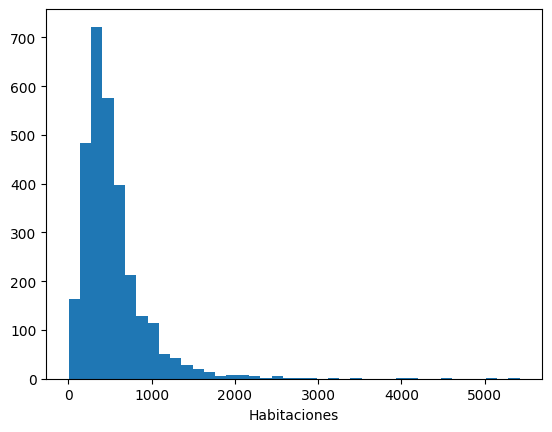

In [10]:
total_bedrooms = np.array(df["total_bedrooms"])

plt.hist(total_bedrooms, bins=40)
plt.xlabel("Habitaciones")
plt.show()

Para reducir el sesgo en distribuciones asimétricas y obtener una forma aproximadamente acampanada, se pueden aplicar transformaciones, como la logarítmica. 

No es relevante la base del logaritmo utilizado, pero en Python suele emplearse `np.log()`. En casos donde la variable representa conteos, como el número de habitaciones por zona, se incrementa en una unidad el valor antes de aplicar la transformación para evitar valores negativos. Esta técnica es útil para ajustar distribuciones con sesgo positivo.

In [11]:
def fun1(x):
    return np.log(x+1)

Una vez aplicada dicha transformación, visualiza el efecto obtenido mediante su histograma:

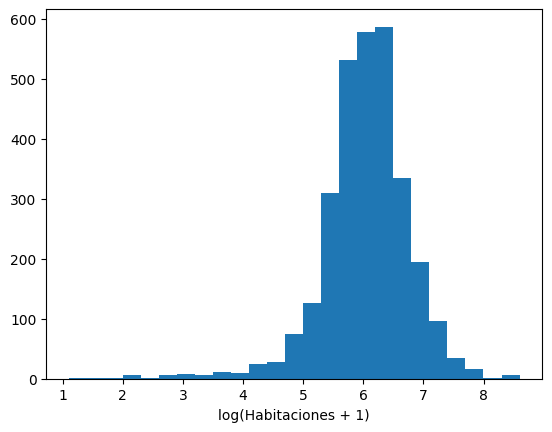

In [13]:
plt.hist(fun1(total_bedrooms), bins=25)
plt.xlabel("log(Habitaciones + 1)")
plt.show()

Este ejercicio te mostró la manera de realizar el **ajuste a una distribución con sesgo positivo.** <br>
Para el caso de una **distribución con sesgo negativo** puedes hacer la **corrección de manera análoga.**

Para ilustrar el caso, transforma los datos anteriores mediante una reflexión con respecto al eje coordenado vertical.


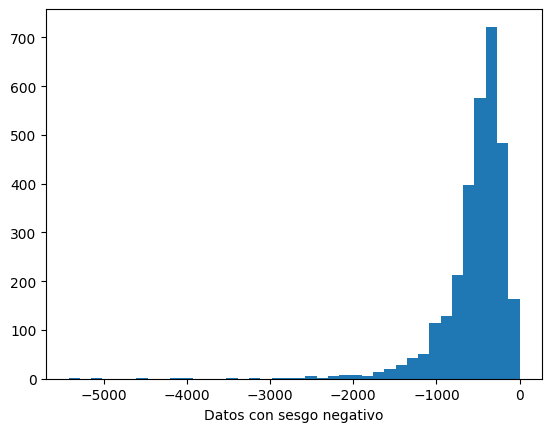

In [14]:
x2 = (-1.0) * total_bedrooms

plt.hist(x2, bins=40)
plt.xlabel("Datos con sesgo negativo")
plt.show()

Ya con estos datos sintéticos de una distribución con sesgo negativo, la manera de transformarlos mediante la función logarítmica podría ser como sigue:


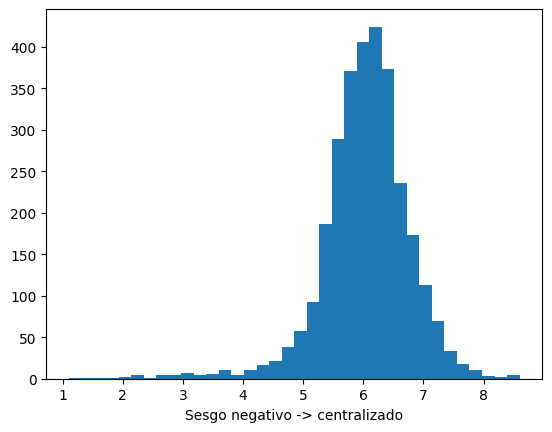

In [15]:
x2new = np.log(1 - x2)

plt.hist(x2new, bins=36)
plt.xlabel("Sesgo negativo -> centralizado")
plt.show()

Y el resultado, es una distribución relativamente acampanada, como se esperaba.

Para datos donde el valor máximo es 0, la transformación a aplicar puede ser `log(M + 1 - x)`, donde `M` representa el valor máximo general de la variable. <br>
Además de la transformación logarítmica, también se pueden utilizar transformaciones basadas en raíces o potencias fraccionarias para reducir el sesgo en la distribución de los datos. <br>

Por ejemplo, para el primer ejemplo de una distribución con sesgo positivo se pueden transformar mediante la raíz cuadrada: 

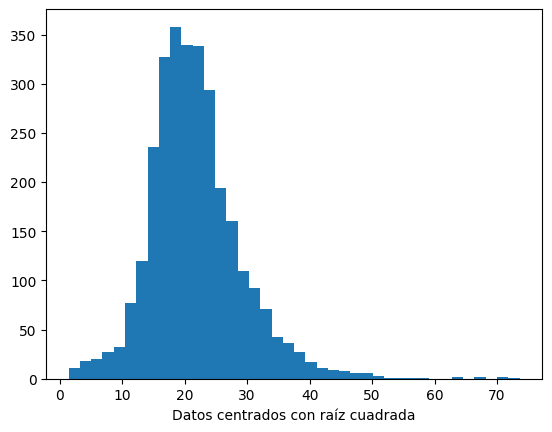

In [16]:
plt.hist(np.sqrt(total_bedrooms),bins=40)
plt.xlabel("Datos centrados con raíz cuadrada")
plt.show()

O bien, usando potencias fraccionarias también se pueden obtener distribuciones aproximadamente acampanadas.

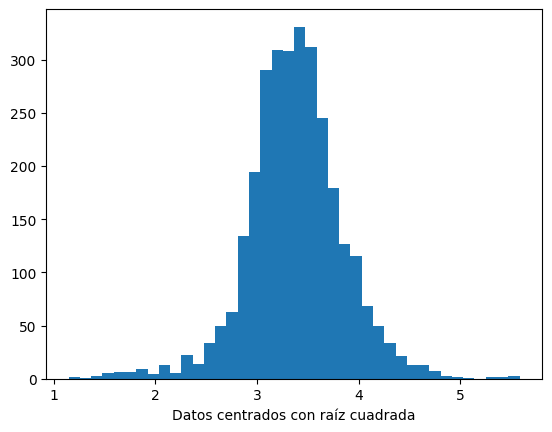

In [20]:
plt.hist(np.power(total_bedrooms, 0.2), bins=40)
plt.xlabel("Datos centrados con raíz cuadrada")
plt.show()

### 2.2.3 Estandarización

Otra transformación común para las variables numéricas es la estandarización o normalización, cuyo objetivo es ajustar su rango de variabilidad para que todas tengan una escala comparable. 

Esto evita que la magnitud de los valores influya en su relevancia y facilita la comparación, mejorando la calidad de gráficos y visualizaciones conjuntas, lo que ayuda en la identificación de distribuciones y valores extremos.

La estandarización se realiza mediante la fórmula:

$$ z = \frac{x - \bar{x}}{s} $$

donde $$( \bar{x} )$$ es el promedio muestral y \( s \) la desviación estándar muestral. Esta transformación ajusta los datos a un rango aproximado entre -5 y +5.

Para variables no negativas, se puede aplicar la normalización con la fórmula:

$$ x' = \frac{x - min}{max - min} $$

donde \( max \) y \( min \) son los valores máximo y mínimo de los datos. Esto ajusta los valores a un rango entre 0 y 1.

Ambas técnicas son conocidas como **escalamiento**.

Es importante resaltar que **estas transformaciones no modifican en general la forma de la distribución de los datos, sino que las ubican cerca del origen.**


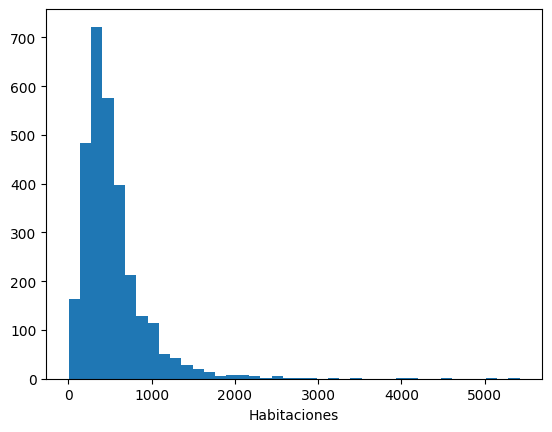

In [21]:
plt.hist(total_bedrooms, bins=40)
plt.xlabel("Habitaciones")
plt.show()

Inicia por definir la transformación de normalización apoyándote de las funciones de Python para obtener el valor promedio y la desviación estándar de los datos:


In [26]:
def fun2(x):
    return ((x - np.mean(x))/np.std(x))

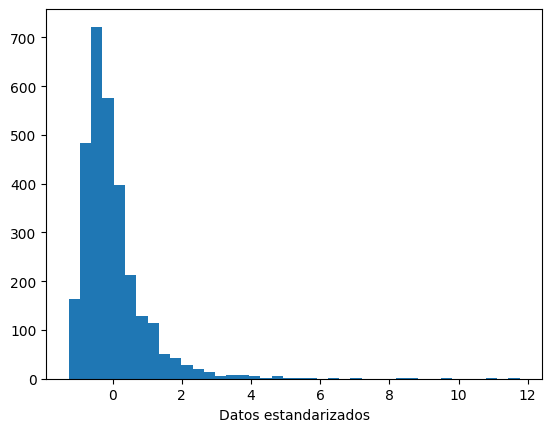

In [27]:
plt.hist(fun2(total_bedrooms), bins=40)
plt.xlabel("Datos estandarizados")
plt.show()

Al aplicar la transformación puedes ver que la forma de la distribución y forma de la gráfica es básicamente la misma, pero el rango se encuentra ahora alrededor del 0, donde el valor máximo ahora es un poco mayor a 10, a diferencia de los datos originales donde este valor es mayor a 5000. 

De manera similar se puede ver el efecto de la transformación de **escalamiento entre 0 y 1**.

In [28]:
def fun3(x):
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

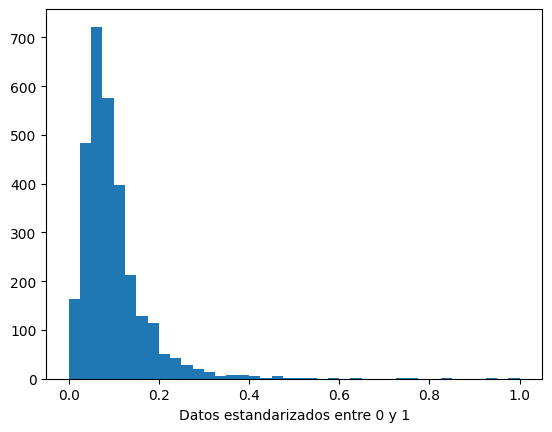

In [29]:
plt.hist(fun3(total_bedrooms), bins=40)
plt.xlabel("Datos estandarizados entre 0 y 1")
plt.show()

# 3 - Los modelos de Aprendizaje Supervisado

Hasta ahora, has aprendido a cargar datos desde diferentes tipos de archivos y a aplicar diversas técnicas de preprocesamiento para organizarlos de manera más limpia y estructurada. También puedes identificar los tipos de variables, diferenciando entre variables numéricas y categóricas, así como distinguir entre variables de entrada y la variable de salida.

Es momento de profundizar en los modelos de **aprendizaje supervisado**.

## 3.1 - Identificacion del tipo de aprendizaje

### 3.1.1 - Aprendizaje Supervisado
Dentro del área de aprendizaje de máquinas, existen dos tipos principales de modelos para el **aprendizaje supervisado**:

- **Modelos de regresión**  
- **Modelos de clasificación**  

Es fundamental identificar desde el inicio qué tipo de modelo aplicar, ya que esto influirá en todo el análisis posterior. 

La clave para diferenciarlos radica en el tipo de **variable de salida**:  
- Si es **numérica**, se trata de un problema de **regresión**.  
- Si es **categórica**, corresponde a un problema de **clasificación**.

#### Ejemplo 1

Un gerente de banco necesita determinar si debe otorgar un crédito hipotecario a un cliente. Para ello, considera diversos factores como estado civil, número de hijos, estabilidad laboral, sueldo mensual, gastos promedio y historial crediticio.

En este caso, todas estas características funcionan como **variables de entrada**, mientras que la decisión final de aprobar o rechazar el crédito es la **variable de salida**.

Dado que la variable de salida es **categórica** con dos posibles valores (“sí se otorga el crédito” o “no se otorga el crédito”), este es un **problema de clasificación**.

#### Ejemplo 2

El problema de la obesidad en México genera altos costos anuales en salud. Se sabe que la **prevención** es más eficiente y económica que el tratamiento, por lo que es crucial contar con un modelo que ayude a monitorear el peso de las personas y facilite la planificación de su alimentación para mantener un estilo de vida saludable.

En este caso, las **variables de entrada** son el **sexo, la edad y la altura**, mientras que la **variable de salida** es el **peso** de cada persona. Como el peso es una **variable numérica continua**, este es un **problema de regresión**.

Es importante destacar que el tipo de modelo no depende de las unidades en las que se expresen las variables, sino de la naturaleza de la **variable de salida** (numérica o categórica). Además, un problema de **regresión** puede transformarse en uno de **clasificación** si la variable continua se discretiza en categorías definidas por el analista.

### 3.1.2 - Análisis de caso en Seaborn

Ahora analizarás un caso en detalle utilizando la librería **Seaborn**, que contiene el conjunto de datos **"Titanic"**, disponible para su descarga en los archivos adjuntos de la plataforma.

Este conjunto de datos incluye información de **891 pasajeros** que estuvieron a bordo del Titanic la noche de su hundimiento en **1912**. Para este ejemplo, solo se utilizarán los datos relacionados con las **edades de los pasajeros**.

In [9]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("titanic.csv")
edad = data["age"]
pd.DataFrame(edad).head(7)

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


El registro NaN indica uno de los datos perdidos de dicha columna. Para fines de este ejercicio eliminaremos todos los datos perdidos como se indica a continuación: 

In [10]:
dfedad = pd.DataFrame(edad.dropna(axis=0, inplace=False))
dfedad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [11]:
print(min(edad))
print(max(edad))

0.42
80.0


La variable **edad** en el conjunto de datos del Titanic está representada por **números reales de tipo flotante**. Para facilitar su análisis, procederemos a **discretizarla** en categorías.

El rango de edades de los pasajeros varía entre **0 y 80 años**. Se definirán tres clases para agrupar los datos:

- **Menores de edad**: de **0 a menos de 18 años**.  
- **Joven**: de **18 a menos de 30 años**.  
- **Adultos**: de **30 a menos de 81 años**.  

Esta discretización permite convertir una **variable numérica continua** en una **variable categórica**, lo que puede ser útil para ciertos tipos de análisis y modelos de clasificación.

Define estos umbrales en una variable llamada “th” y utiliza luego la función “cut” de Pandas para generar los tres intervalos indicando que el límite superior no se incluye y por lo tanto sí se incluye el límite inferior:

In [13]:
th = [0, 18, 30, 90]
dfedad['age-d'] = pd.cut(dfedad['age'], bins=th, right=False,labels=["Menor", "Joven", "Adulto"])
dfedad.head(9)

,age,age-d
0,22.0,Joven
1,38.0,Adulto
2,26.0,Joven
3,35.0,Adulto
4,35.0,Adulto
6,54.0,Adulto
7,2.0,Menor
8,27.0,Joven
9,14.0,Menor


De la información de la nueva variable discretizada que llamamos “age-d” observa que ya se indica que dichos datos son categóricos, o “category” en inglés: 

In [14]:
dfedad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     714 non-null    float64 
 1   age-d   714 non-null    category
dtypes: category(1), float64(1)
memory usage: 12.0 KB


Por último, verifica que cada una de estas tres clases tiene al menos el 10% de los datos:

In [21]:
round(100 * (dfedad['age-d'].value_counts())/dfedad.shape[0])

age-d
Adulto    46.0
Joven     38.0
Menor     16.0
Name: count, dtype: float64

Recuerda que cualquier decisión que tomes como analista de datos, debes siempre documentarla y consultarla con tu equipo de trabajo y los tomadores de decisiones de tu empresa.